## Import Reqired Libraries

In [ ]:
# For databases
import pandas as pd
import numpy as np
from google.colab import drive

# For ploting graphs
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Preprocessing data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer

# Modeling machine learning
from sklearn.model_selection import learning_curve,cross_val_score,train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Modeling the clusters
from sklearn.cluster import KMeans, DBSCAN
from yellowbrick.cluster import KElbowVisualizer

## Read the Data

In [ ]:
drive.mount('/content/drive', force_remount=True) 


Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/DM-project/test.csv.zip
!unzip /content/drive/MyDrive/DM-project/train.csv.zip


Archive:  /content/drive/MyDrive/DM-project/test.csv.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                
Archive:  /content/drive/MyDrive/DM-project/train.csv.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


In [ ]:
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

## Understand the Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [ ]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [ ]:
df.nunique()

Unnamed: 0                           103904
id                                   103904
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3802
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes      

In [ ]:
df.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
# Checking if there's any duplicate row
df[df.duplicated()]

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction


## Data cleaning

In [ ]:
df.drop(columns="Unnamed: 0", inplace=True)

# Reseting index for "id" since these values are unique for each row:
df.set_index("id", inplace=True)

# Gender : 1 for Female and 0 for Male
df.Gender = df.Gender.apply(lambda x: 1 if x=="Female" else 0)

df.head(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
70172,0,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
5047,0,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
110028,1,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
24026,1,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
119299,0,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
# Sorting by the index, in order to have a cleaner structure
df.sort_values(by="id",inplace=True)
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
1,0,disloyal Customer,48,Business travel,Business,821,3,3,3,3,...,5,3,2,5,4,5,5,2,5.0,neutral or dissatisfied
2,1,Loyal Customer,35,Business travel,Business,821,2,2,2,2,...,5,5,5,5,3,5,5,26,39.0,satisfied
3,0,Loyal Customer,41,Business travel,Business,853,4,4,4,4,...,3,3,3,3,4,3,5,0,0.0,satisfied
4,0,Loyal Customer,50,Business travel,Business,1905,2,2,2,2,...,5,5,5,5,3,5,4,0,0.0,satisfied
5,1,Loyal Customer,49,Business travel,Business,3470,3,3,3,3,...,3,3,4,3,3,3,5,0,1.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129874,1,Loyal Customer,28,Personal Travel,Eco Plus,337,4,2,4,4,...,3,1,5,3,4,4,3,0,0.0,neutral or dissatisfied
129875,1,Loyal Customer,55,Personal Travel,Eco Plus,308,3,4,3,4,...,4,4,3,4,4,4,4,0,0.0,neutral or dissatisfied
129878,0,Loyal Customer,42,Personal Travel,Eco Plus,337,2,5,2,1,...,3,3,4,5,4,4,3,6,14.0,neutral or dissatisfied


In [ ]:
df["Customer Type"].unique()

array(['disloyal Customer', 'Loyal Customer'], dtype=object)

In [ ]:
# Cleaning column "Customer Type" to indicate only if customer is loyal or not
df.rename(columns={"Customer Type":"Loyal"}, inplace=True)
df["Loyal"] = df["Loyal"].apply(lambda x: 1 if x=='Loyal Customer' else 0)
df

,Gender,Loyal,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
1,0,0,48,Business travel,Business,821,3,3,3,3,...,5,3,2,5,4,5,5,2,5.0,neutral or dissatisfied
2,1,1,35,Business travel,Business,821,2,2,2,2,...,5,5,5,5,3,5,5,26,39.0,satisfied
3,0,1,41,Business travel,Business,853,4,4,4,4,...,3,3,3,3,4,3,5,0,0.0,satisfied
4,0,1,50,Business travel,Business,1905,2,2,2,2,...,5,5,5,5,3,5,4,0,0.0,satisfied
5,1,1,49,Business travel,Business,3470,3,3,3,3,...,3,3,4,3,3,3,5,0,1.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129874,1,1,28,Personal Travel,Eco Plus,337,4,2,4,4,...,3,1,5,3,4,4,3,0,0.0,neutral or dissatisfied
129875,1,1,55,Personal Travel,Eco Plus,308,3,4,3,4,...,4,4,3,4,4,4,4,0,0.0,neutral or dissatisfied
129878,0,1,42,Personal Travel,Eco Plus,337,2,5,2,1,...,3,3,4,5,4,4,3,6,14.0,neutral or dissatisfied


In [ ]:
# Cleaning column "Type of Travel" to indicate only is a Business Traveler or not
df.rename(columns={'Type of Travel':"Business Travel"}, inplace=True)
df["Business Travel"] = df["Business Travel"].apply(lambda x: 1 if x=='Business travel' else 0)
df

,Gender,Loyal,Age,Business Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
1,0,0,48,1,Business,821,3,3,3,3,...,5,3,2,5,4,5,5,2,5.0,neutral or dissatisfied
2,1,1,35,1,Business,821,2,2,2,2,...,5,5,5,5,3,5,5,26,39.0,satisfied
3,0,1,41,1,Business,853,4,4,4,4,...,3,3,3,3,4,3,5,0,0.0,satisfied
4,0,1,50,1,Business,1905,2,2,2,2,...,5,5,5,5,3,5,4,0,0.0,satisfied
5,1,1,49,1,Business,3470,3,3,3,3,...,3,3,4,3,3,3,5,0,1.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129874,1,1,28,0,Eco Plus,337,4,2,4,4,...,3,1,5,3,4,4,3,0,0.0,neutral or dissatisfied
129875,1,1,55,0,Eco Plus,308,3,4,3,4,...,4,4,3,4,4,4,4,0,0.0,neutral or dissatisfied
129878,0,1,42,0,Eco Plus,337,2,5,2,1,...,3,3,4,5,4,4,3,6,14.0,neutral or dissatisfied


In [ ]:
# Cleaning column "Satisfaction" to indicate only if customer was satisfied or not
df.rename(columns={"satisfaction":"Dissatisfied"}, inplace=True)
df["Dissatisfied"] = df["Dissatisfied"].apply(lambda x: 1 if x=='neutral or dissatisfied' else 0)
df

,Gender,Loyal,Age,Business Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Dissatisfied
id,,,,,,,,,,,,,,,,,,,,,
1,0,0,48,1,Business,821,3,3,3,3,...,5,3,2,5,4,5,5,2,5.0,1
2,1,1,35,1,Business,821,2,2,2,2,...,5,5,5,5,3,5,5,26,39.0,0
3,0,1,41,1,Business,853,4,4,4,4,...,3,3,3,3,4,3,5,0,0.0,0
4,0,1,50,1,Business,1905,2,2,2,2,...,5,5,5,5,3,5,4,0,0.0,0
5,1,1,49,1,Business,3470,3,3,3,3,...,3,3,4,3,3,3,5,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129874,1,1,28,0,Eco Plus,337,4,2,4,4,...,3,1,5,3,4,4,3,0,0.0,1
129875,1,1,55,0,Eco Plus,308,3,4,3,4,...,4,4,3,4,4,4,4,0,0.0,1
129878,0,1,42,0,Eco Plus,337,2,5,2,1,...,3,3,4,5,4,4,3,6,14.0,1


### Basic Analysis

In [ ]:
# Grouping by gender to visualize if there's any significant difference between these two populations
df.groupby("Gender").mean()

<ipython-input-16-5b89d0091db5>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Gender").mean()


,Loyal,Age,Business Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Dissatisfied
Gender,,,,,,,,,,,,,,,,,,,,,
0,0.829767,39.516677,0.686383,1195.346621,2.741779,3.074448,2.766770,2.977314,3.209919,3.192489,...,3.366434,3.393028,3.393517,3.676652,3.317858,3.687457,3.295015,14.929500,15.194226,0.560525
1,0.805242,39.246762,0.692776,1183.723519,2.717943,3.046561,2.747321,2.976464,3.194568,3.306560,...,3.350124,3.372011,3.309841,3.588332,3.291122,3.594781,3.277941,14.705085,15.163592,0.572629


Text(0.5, 1.0, 'Histogram of Ages - MEN')

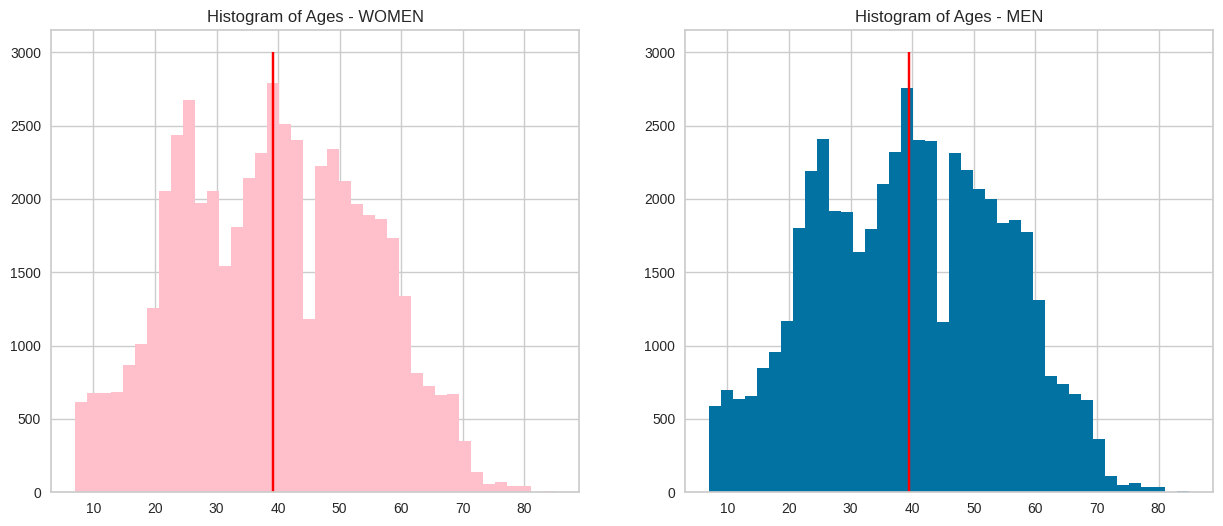

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,6))
ax1.hist(df[df["Gender"]==1]["Age"],bins=40,color="pink")
ax1.vlines(df[df["Gender"]==1]["Age"].mean(),1,3000,color="red")
ax1.set_title("Histogram of Ages - WOMEN")

ax2.hist(df[df["Gender"]==0]["Age"],bins=40)
ax2.vlines(df[df["Gender"]==0]["Age"].mean(),1,3000,color="red")
ax2.set_title("Histogram of Ages - MEN")

In [ ]:
df.groupby("Gender").mean().round(2)

<ipython-input-18-91a151430568>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Gender").mean().round(2)


,Loyal,Age,Business Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Dissatisfied
Gender,,,,,,,,,,,,,,,,,,,,,
0,0.83,39.52,0.69,1195.35,2.74,3.07,2.77,2.98,3.21,3.19,...,3.37,3.39,3.39,3.68,3.32,3.69,3.30,14.93,15.19,0.56
1,0.81,39.25,0.69,1183.72,2.72,3.05,2.75,2.98,3.19,3.31,...,3.35,3.37,3.31,3.59,3.29,3.59,3.28,14.71,15.16,0.57


In [ ]:
# Creating bins for AGE and grouping by the Age bins and also by sex, to better visualize the data
df.groupby([pd.cut(df["Age"],bins=5),"Gender"]).mean()

<ipython-input-19-da674613978b>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby([pd.cut(df["Age"],bins=5),"Gender"]).mean()


Loyal        Age  Business Travel  Flight Distance  \
Age           Gender                                                          
(6.922, 22.6] 0       0.727409  16.185901         0.447333       915.049401   
              1       0.698330  16.360321         0.472906       923.458498   
(22.6, 38.2]  0       0.695228  30.408636         0.752227      1130.900436   
              1       0.658247  30.225907         0.760106      1102.225258   
(38.2, 53.8]  0       0.921430  45.594075         0.781532      1371.990627   
              1       0.907468  45.577158         0.783502      1362.860574   
(53.8, 69.4]  0       0.964077  59.600791         0.590796      1207.247605   
              1       0.956585  59.607714         0.592451      1223.575848   
(69.4, 85.0]  0       0.933333  72.536364         0.622727      1106.650000   
              1       0.903226  72.838710         0.645161      1037.447405   

                      Inflight wifi service  \
Age           Gender                          
(6.922, 22.6] 0                    2.681138   
              1                    2.624633   
(22.6, 38.2]  0                    2.726860   
              1                    2.679788   
(38.2, 53.8]  0                    2.807105   
              1                    2.810200   
(53.8, 69.4]  0                    2.702416   
              1                    2.699701   
(69.4, 85.0]  0                    2.646970   
              1                    2.631136   

                      Departure/Arrival time convenient  \
Age           Gender                                      
(6.922, 22.6] 0                                3.135275   
              1                                3.098432   
(22.6, 38.2]  0                                2.960506   
              1                                2.903098   
(38.2, 53.8]  0                                3.081173   
              1                                3.068629   
(53.8, 69.4]  0                                3.202103   
              1                                3.208209   
(69.4, 85.0]  0                                3.174242   
              1                                3.144460   

                      Ease of Online booking  Gate location  Food and drink  \
Age           Gender                                                          
(6.922, 22.6] 0                     2.673925       2.961894        3.078389   
              1                     2.640189       2.979982        3.078414   
(22.6, 38.2]  0                     2.751797       2.977274        3.218783   
              1                     2.703452       2.977988        3.184538   
(38.2, 53.8]  0                     2.837133       2.986924        3.271870   
              1                     2.840664       2.989503        3.253637   
(53.8, 69.4]  0                     2.731987       2.972095        3.193149   
              1                     2.741776       2.951531        3.209034   
(69.4, 85.0]  0                     2.833333       2.974242        3.077273   
              1                     2.748948       2.920056        3.061711   

                      Online boarding  ...  Inflight entertainment  \
Age           Gender                   ...                           
(6.922, 22.6] 0              2.741290  ...                3.096217   
              1              2.689405  ...                3.102894   
(22.6, 38.2]  0              3.020822  ...                3.278914   
              1              2.974447  ...                3.257893   
(38.2, 53.8]  0              3.511919  ...                3.560171   
              1              3.680130  ...                3.533801   
(53.8, 69.4]  0              3.274781  ...                3.392024   
              1              3.706713  ...                3.400330   
(69.4, 85.0]  0              2.887879  ...                3.087879   
              1              3.361851  ...                3.063114   

            

In [ ]:
# Visualizing the target by Gender
pd.crosstab(df.Dissatisfied,df.Gender)

Gender,0,1
Dissatisfied,,
0,22491,22534
1,28686,30193


<div>As can be seen, gender does not have a significant impact on future decision-making because everything is mostly similar among them.</div>

Text(0.5, 1.0, 'Histogram of Ages')

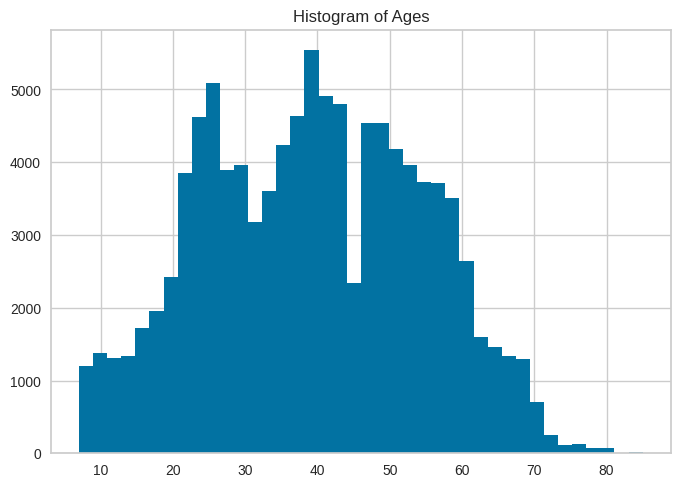

In [ ]:
#check previous states for Age
df.Age.hist(bins=40)
plt.title("Histogram of Ages")

<ipython-input-22-48a303fa3b68>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

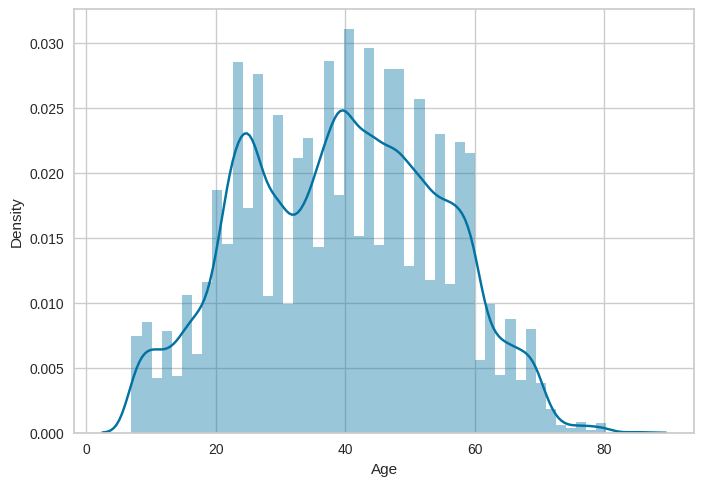

In [ ]:
sns.distplot(df['Age'])
# Distribution of Age

In [ ]:
# Creating bins for AGE and grouping by the bins, to better visualize the data
df.groupby(pd.cut(df["Age"],bins=10)).mean()

<ipython-input-23-3d96f4e05490>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(pd.cut(df["Age"],bins=10)).mean()


,Gender,Loyal,Age,Business Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Dissatisfied
Age,,,,,,,,,,,,,,,,,,,,,
"(6.922, 14.8]",0.507075,0.887763,10.576864,0.218738,914.504780,2.552008,3.397132,2.560994,2.945889,2.990249,...,3.018164,3.224283,3.204207,3.666539,3.204589,3.691778,3.005736,15.349713,15.702957,0.861377
"(14.8, 22.6]",0.521132,0.620319,19.268246,0.587491,921.956430,2.704447,2.968778,2.706656,2.984540,3.124686,...,3.142456,3.219958,3.191748,3.685775,3.212629,3.689891,3.141652,15.316534,15.957629,0.710370
"(22.6, 30.4]",0.520096,0.580895,26.291700,0.772174,1088.282079,2.688375,2.858761,2.729420,2.968519,3.209723,...,3.216213,3.242172,3.217693,3.678128,3.240066,3.685870,3.223728,15.111010,15.439566,0.637140
"(30.4, 38.2]",0.498659,0.783461,34.828927,0.738378,1147.677778,2.719093,3.012516,2.724585,2.987867,3.191890,...,3.326501,3.324777,3.309451,3.613410,3.224266,3.628097,3.231098,14.969349,15.509131,0.609515
"(38.2, 46.0]",0.503914,0.888137,42.334377,0.800212,1354.330438,2.817534,3.058229,2.844654,2.993788,3.259684,...,3.534064,3.527044,3.530832,3.667189,3.385233,3.674562,3.409626,14.905762,15.240103,0.423615
"(46.0, 53.8]",0.502998,0.949041,49.873901,0.759193,1384.623768,2.796962,3.096789,2.831335,2.980882,3.266653,...,3.563816,3.564415,3.518918,3.656142,3.430855,3.662936,3.423661,14.657008,14.931779,0.421396
"(53.8, 61.6]",0.501838,0.961261,57.215451,0.708321,1335.232138,2.757571,3.122832,2.791238,2.973758,3.246545,...,3.524184,3.527418,3.490444,3.634813,3.410026,3.632167,3.407895,14.030800,14.217725,0.454499
"(61.6, 69.4]",0.503774,0.958048,65.308583,0.312972,929.423030,2.566087,3.401790,2.607162,2.933123,3.092680,...,3.090574,3.159558,2.992452,3.325259,3.186414,3.349131,3.134281,14.235914,14.445384,0.805512
"(69.4, 77.2]",0.515378,0.940981,71.679967,0.582710,1070.611804,2.610973,3.213633,2.760599,2.935993,3.051538,...,3.073150,3.043225,2.912718,3.187032,2.988362,3.229426,2.976725,13.109726,13.761468,0.786367


In [ ]:
# Visualizing the target by bins of Age
pd.crosstab(df.Dissatisfied,pd.cut(df["Age"],bins=5))

Age,"(6.922, 22.6]","(22.6, 38.2]","(38.2, 53.8]","(53.8, 69.4]","(69.4, 85.0]"
Dissatisfied,,,,,
0,3610,12489,20099,8529,298
1,11581,20737,14714,10772,1075


<div>As observed, within the age range of 38.2 to 53.8, the number of satisfied individuals is greater than the number of dissatisfied or neutral individuals. Thus, we will examine this range more closely to obtain better results.</div>

In [ ]:
# Visualizing the target by bins of Age
pd.crosstab(df.Dissatisfied,pd.cut(df["Age"],bins=10),)

Age,"(6.922, 14.8]","(14.8, 22.6]","(22.6, 30.4]","(30.4, 38.2]","(38.2, 46.0]","(46.0, 53.8]","(53.8, 61.6]","(61.6, 69.4]","(69.4, 77.2]","(77.2, 85.0]"
Dissatisfied,,,,,,,,,,
0,725,2885,6374,6115,11413,8686,7421,1108,257,41
1,4505,7076,11192,9545,8388,6326,6183,4589,946,129


<div>As observed, with more precise ranges, from 38.2 to 46, there are more satisfied individuals.</div>

In [ ]:
# Visualizing the target by bins of Age, showed in percentage of each column (normalized)
pd.crosstab(df.Dissatisfied,pd.cut(df["Age"],bins=10),normalize="columns").round(2)

Age,"(6.922, 14.8]","(14.8, 22.6]","(22.6, 30.4]","(30.4, 38.2]","(38.2, 46.0]","(46.0, 53.8]","(53.8, 61.6]","(61.6, 69.4]","(69.4, 77.2]","(77.2, 85.0]"
Dissatisfied,,,,,,,,,,
0,0.14,0.29,0.36,0.39,0.58,0.58,0.55,0.19,0.21,0.24
1,0.86,0.71,0.64,0.61,0.42,0.42,0.45,0.81,0.79,0.76


<Figure size 1600x800 with 0 Axes>

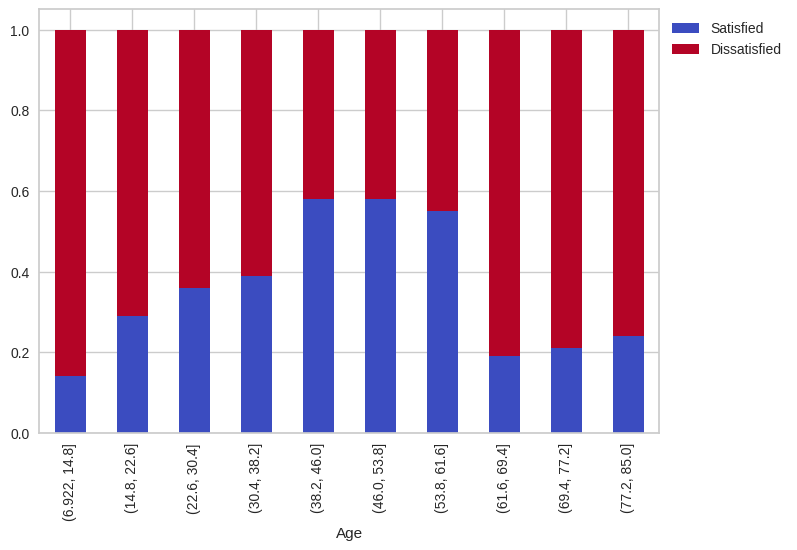

In [ ]:
# Visualizing the target by bins of Age, showed in percentage of each column (normalized)
plt.figure(figsize=(16,8))
pd.crosstab(pd.cut(df["Age"],bins=10),df.Dissatisfied,normalize='index').round(2).plot.bar(stacked=True,cmap="coolwarm")

plt.legend(labels=["Satisfied","Dissatisfied"],bbox_to_anchor=(1,1))

## Basic Data Visualizations for further understanding

<ipython-input-28-5420d9efa663>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


<Axes: >

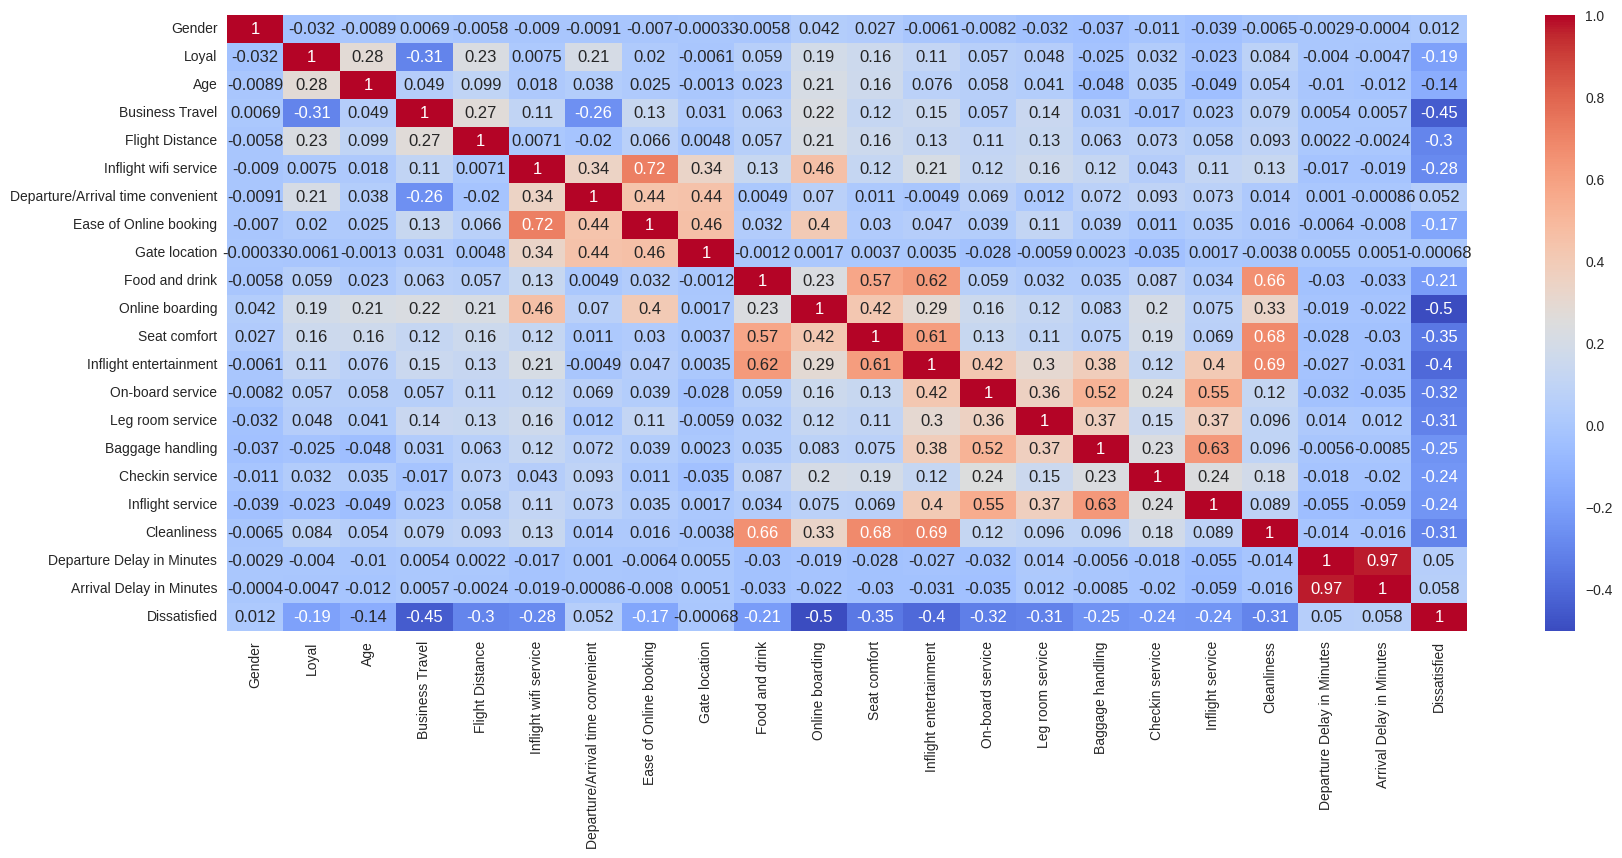

In [ ]:
# Correlation between different variables
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

As can be seen, the two features of arrival delay and departure delay are very much related to each other.

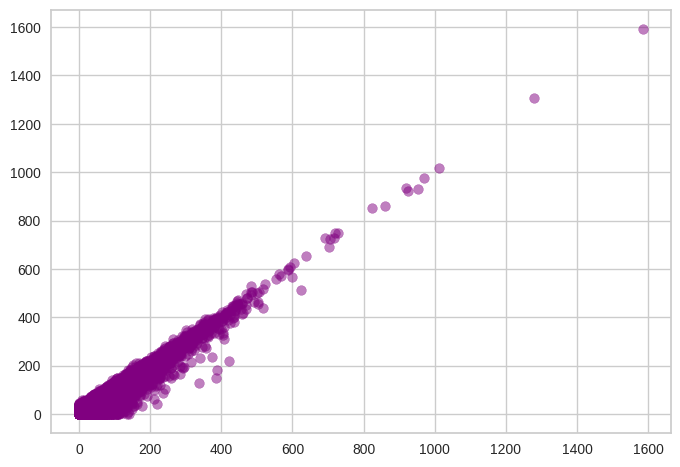

In [ ]:
plt.scatter(df['Arrival Delay in Minutes'], df['Departure Delay in Minutes'],c='purple', alpha = 0.5)

You can see that the points are somewhat aligned along a straight line that rises from the lower left corner to the upper right. Therefore, in some approximations, the dependence of arrival delay on departure delay is linear.
The results obtained are entirely logical and can be explained as follows: If the airline flights are delayed by a certain amount at departure, then the flight will almost be delayed by the same amount upon arrival (provided that the airplane does not accelerate in flight to make up for the lost time).
It is better to remove one of these two features, so we will examine which one is better to remove.

In [ ]:
df.isnull().sum()

Gender                                 0
Loyal                                  0
Age                                    0
Business Travel                        0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
Dissatisfied                           0
dtype: int64

Since we have missing values in the arrival delay, it is better to remove this feature.

<ipython-input-31-9d515a60227c>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap="coolwarm")


<Axes: >

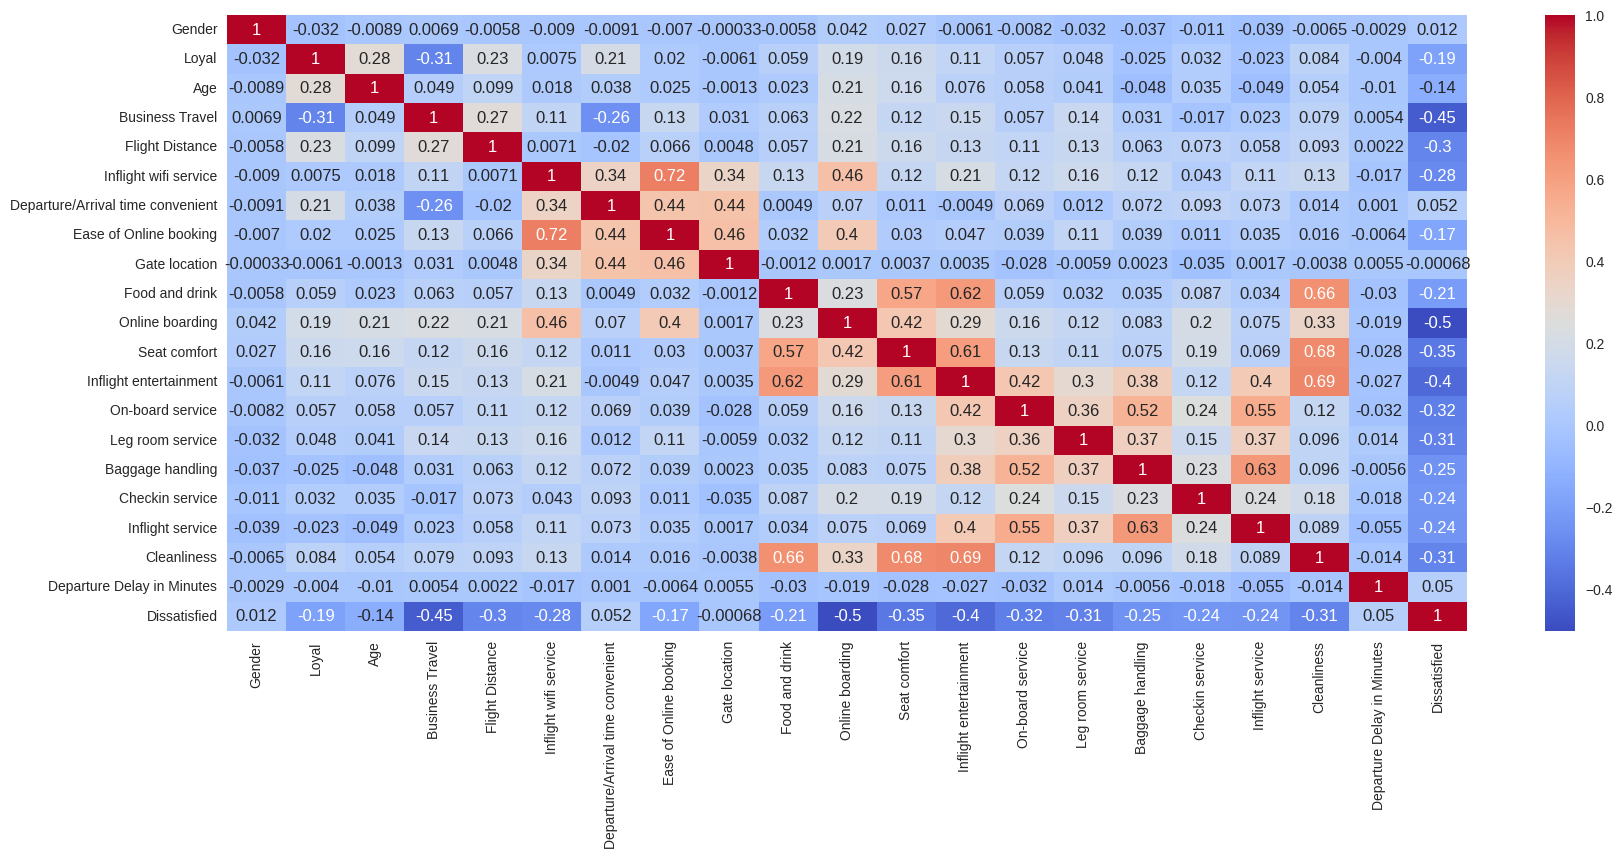

In [ ]:
# Droping column "Arrival Delay in Minutes"
df.drop(columns="Arrival Delay in Minutes", inplace=True)

# Printing the heatmap once again 
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

### Visualizing some more

<Axes: xlabel='Dissatisfied', ylabel='count'>

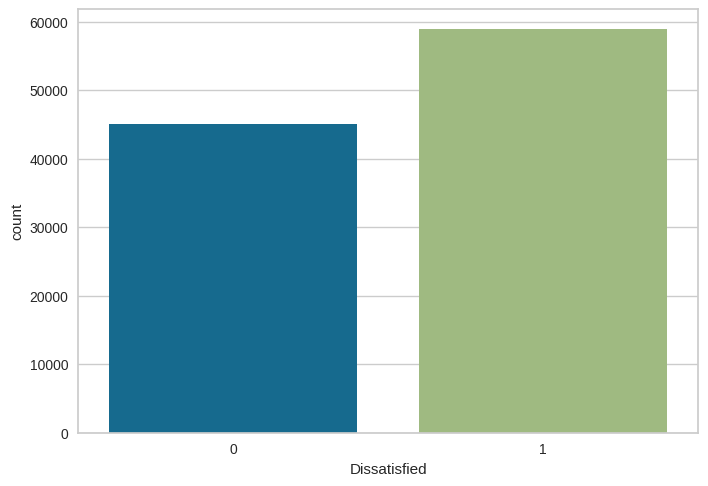

In [ ]:
sns.countplot(x='Dissatisfied', data=df)

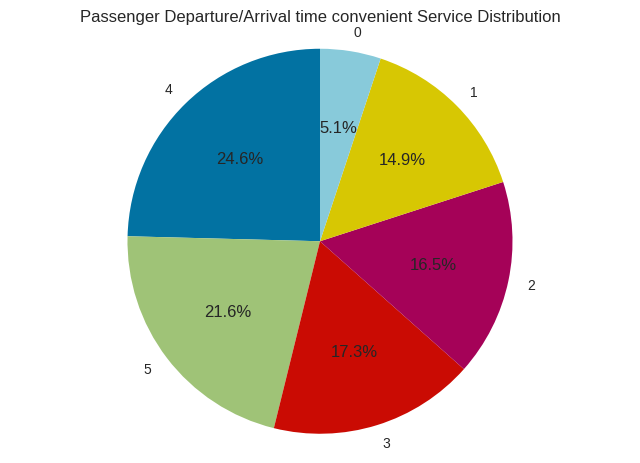

In [ ]:
time_counts = df['Departure/Arrival time convenient'].value_counts()

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(time_counts, labels=time_counts.index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')

plt.title('Passenger Departure/Arrival time convenient Service Distribution')
plt.show()

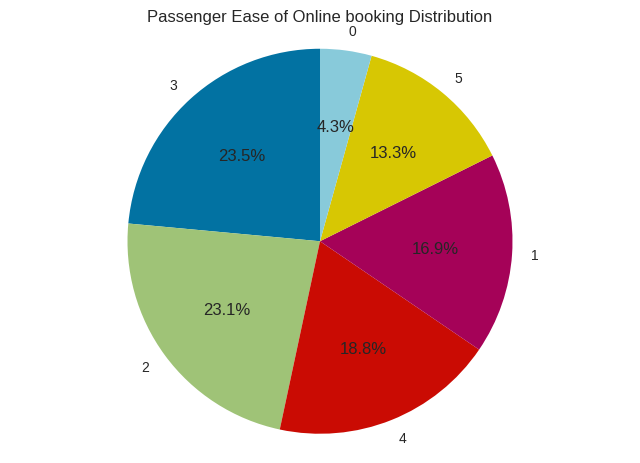

In [ ]:
booking_counts = df['Ease of Online booking'].value_counts()

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(booking_counts, labels=booking_counts.index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')

plt.title('Passenger Ease of Online booking Distribution')
plt.show()

<ipython-input-35-4d8f5398c321>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Flight Distance'])


<Axes: xlabel='Flight Distance', ylabel='Density'>

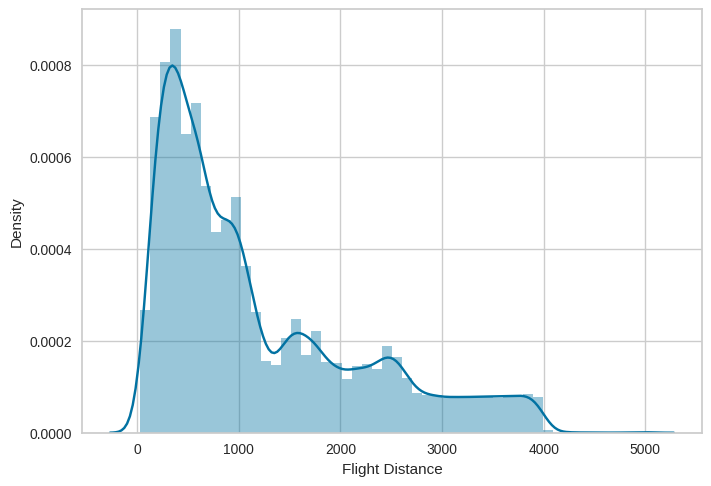

In [ ]:
sns.distplot(df['Flight Distance'])
# Distribution of Flight Distance

Since this chart is skewed, it should be normalized to work better for the model later. We will address this in the subsequent sections.

MAXIMUM 'Flight Distance': 4983
MINIMUM 'Flight Distance': 31


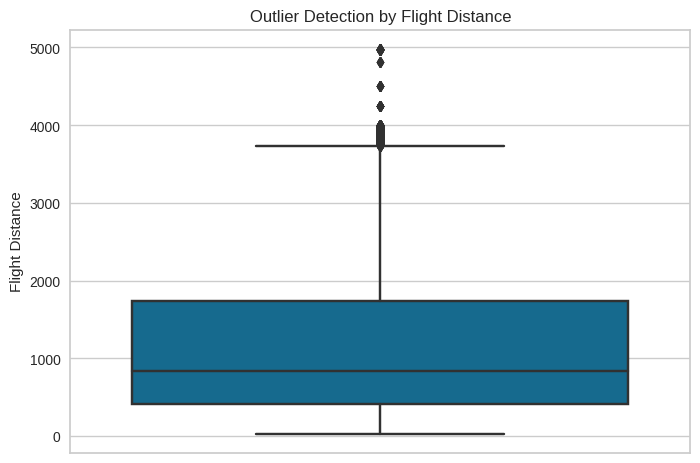

In [ ]:
# Cheking outliers in "Flight Distance"
print("MAXIMUM 'Flight Distance':",df["Flight Distance"].max())
print("MINIMUM 'Flight Distance':",df["Flight Distance"].min())
sns.boxplot(y='Flight Distance', data=df)
plt.title('Outlier Detection by Flight Distance')
plt.ylabel('Flight Distance')
plt.show()

We see that this feature has a lot of outliers that will need to be removed later.

MAXIMUM 'Departure Delay in Minutes': 1592
MINIMUM 'Departure Delay in Minutes': 0
58668


Text(0.5, 1.0, 'Outlier Detection by Departure Delay in Minutes')

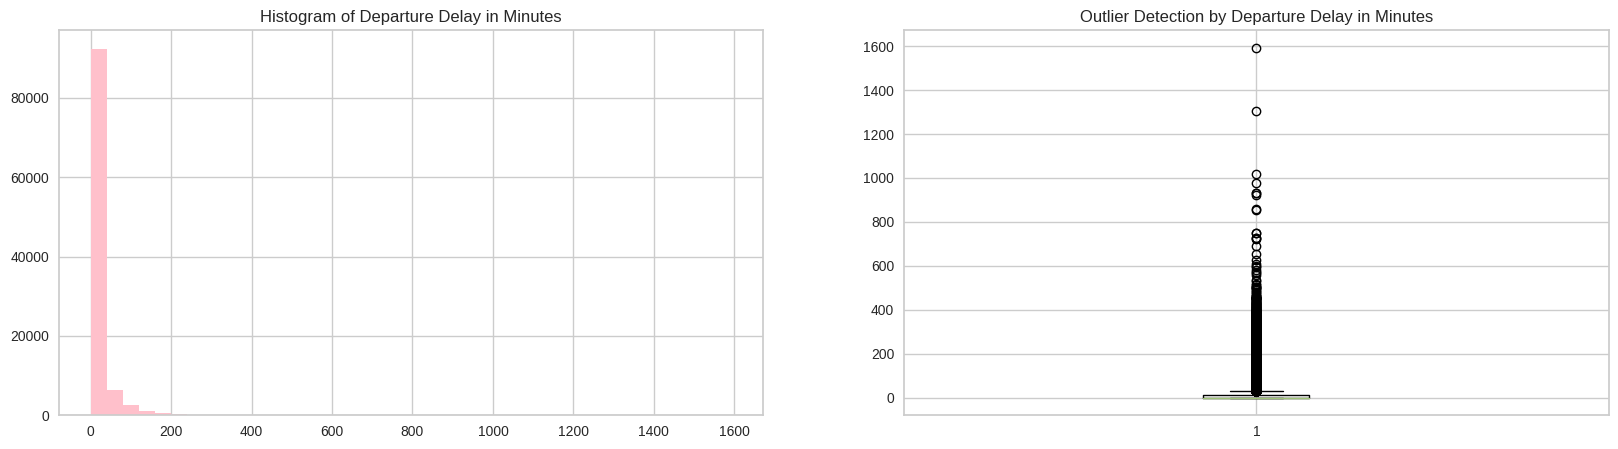

In [ ]:
# Analyzing the 'Departure Delay in Minutes'
print("MAXIMUM 'Departure Delay in Minutes':",df["Departure Delay in Minutes"].max())
print("MINIMUM 'Departure Delay in Minutes':",df["Departure Delay in Minutes"].min())
print(df["Departure Delay in Minutes"].value_counts().max())
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,5))
ax1.hist(df["Departure Delay in Minutes"],bins=40,color="pink")
ax1.set_title("Histogram of Departure Delay in Minutes")
ax2.boxplot(x="Departure Delay in Minutes" , data=df )
ax2.set_title('Outlier Detection by Departure Delay in Minutes')

Because the graph of this feature is heavily skewed, it should be normalized, and many outliers are also observed.

The feature of Departure Delay in Minutes has many zeros and values in the thousands, which is very strange. Since there are so many zeros, we will try different methods to see which works best to solve the problem.

## Cleaning with Features Transformation

In [ ]:
# Creating a new DataFrame to store the transfomed dataframe
new_df = df.copy()

## Testing: Standardizing and Scaling Variables

In [ ]:
new_df["Departure Delay in Minutes"].value_counts().sort_values(ascending=False)

0      58668
1       2948
2       2274
3       2009
4       1854
       ...  
570        1
370        1
372        1
559        1
359        1
Name: Departure Delay in Minutes, Length: 446, dtype: int64

### Testing the standardization first

In [ ]:
# Analyzing the two previous variables standardized
from mlxtend.preprocessing import standardize

X = new_df["Departure Delay in Minutes"]
X2 = new_df["Flight Distance"]
Y = pd.DataFrame(standardize(X))
Y2 = pd.DataFrame(standardize(X2))

/usr/local/lib/python3.10/dist-packages/mlxtend/preprocessing/scaling.py:107: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ary_new = ary_new[:, np.newaxis]


Text(0.5, 1.0, 'Histogram of standardized values of Departure Delay in Minutes')

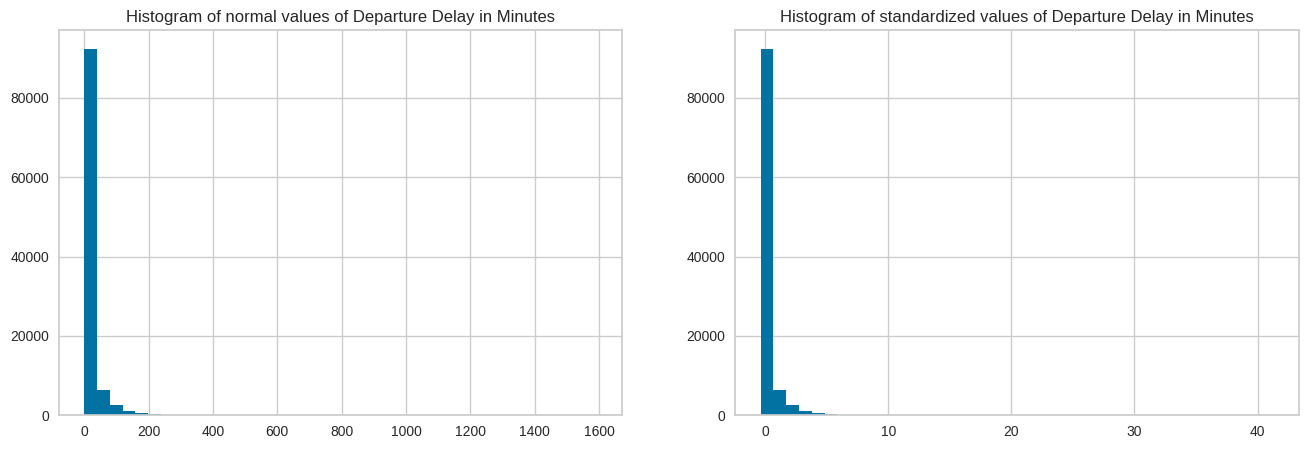

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,5))
ax1.hist(X,bins=40)
ax1.set_title("Histogram of normal values of Departure Delay in Minutes")
ax2.hist(Y,bins=40)
ax2.set_title("Histogram of standardized values of Departure Delay in Minutes")

Text(0.5, 1.0, 'Histogram of standardized values of Flight Distance')

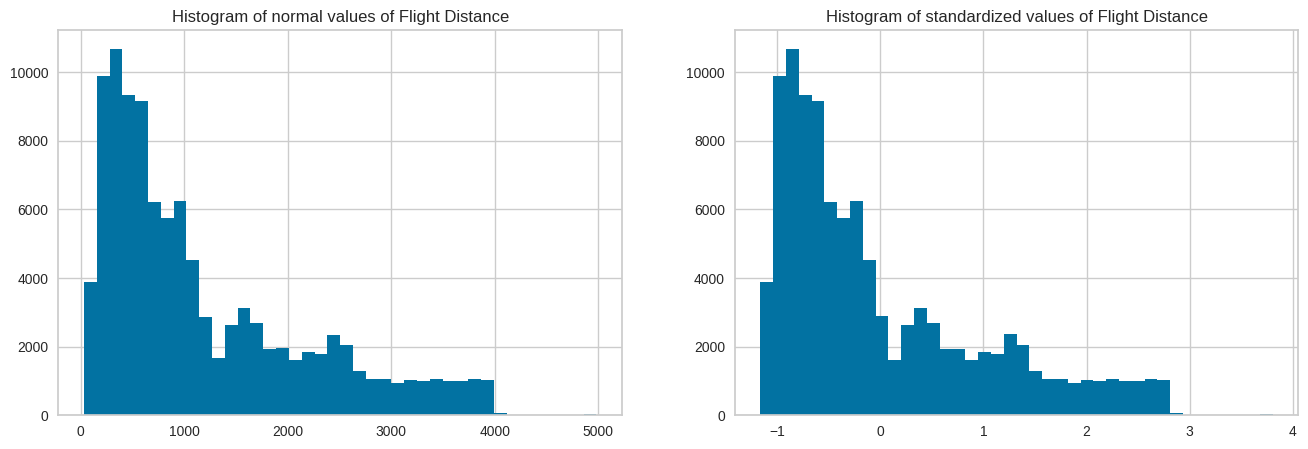

In [ ]:
fig2, (ax3,ax4) = plt.subplots(1,2,figsize=(16,5))
ax3.hist(X2,bins=40)
ax3.set_title("Histogram of normal values of Flight Distance")
ax4.hist(Y2,bins=40)
ax4.set_title("Histogram of standardized values of Flight Distance")

### Testing the normalizer

In [ ]:
norm = Normalizer(X)
norm

Normalizer(norm=id
1          2
2         26
3          0
4          0
5          0
          ..
129874     0
129875     0
129878     6
129879    31
129880     0
Name: Departure Delay in Minutes, Length: 103904, dtype: int64)

In [ ]:
norm2= Normalizer(X2)
norm2

Normalizer(norm=id
1          821
2          821
3          853
4         1905
5         3470
          ... 
129874     337
129875     308
129878     337
129879     337
129880     337
Name: Flight Distance, Length: 103904, dtype: int64)

### Testing the MinMaxScaler

In [ ]:
# Analyzing the two previous variables scaled by MinMaxScaler
min_max_scaler = MinMaxScaler()
test = new_df[['Flight Distance',"Departure Delay in Minutes"]].copy()
test_scaled = pd.DataFrame( min_max_scaler.fit_transform(test), columns=("Flight Distance","Departure Delay in Minutes") )
test_scaled

,Flight Distance,Departure Delay in Minutes
0,0.159532,0.001256
1,0.159532,0.016332
2,0.165994,0.000000
3,0.378433,0.000000
4,0.694467,0.000000
...,...,...
103899,0.061793,0.000000
103900,0.055937,0.000000
103901,0.061793,0.003769
103902,0.061793,0.019472


Text(0.5, 1.0, 'Histogram of Departure Delay MinMaxScaled')

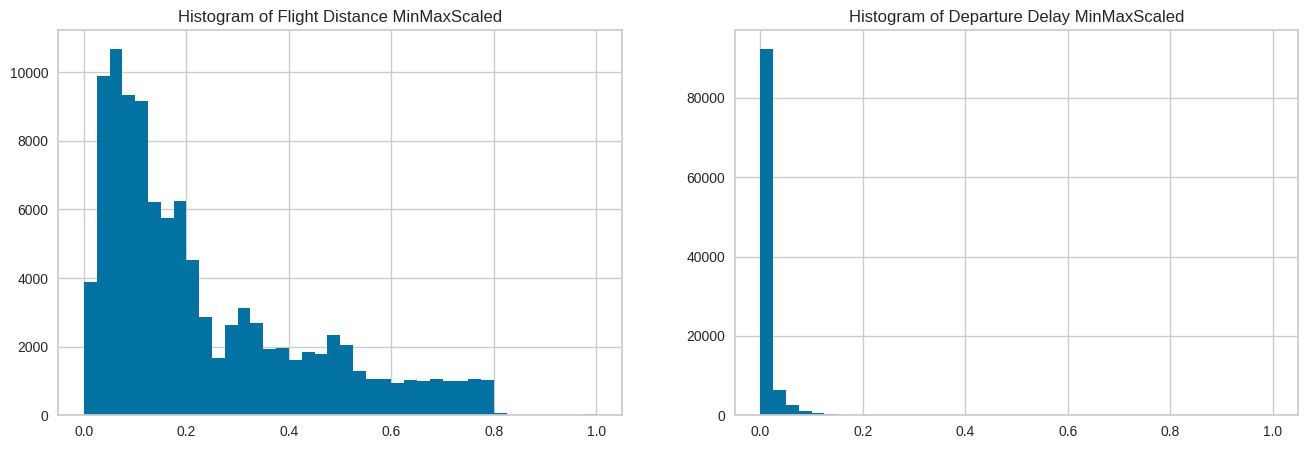

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,5))
ax1.hist(test_scaled["Flight Distance"],bins=40)
ax1.set_title("Histogram of Flight Distance MinMaxScaled")
ax2.hist(test_scaled["Departure Delay in Minutes"],bins=40)
ax2.set_title("Histogram of Departure Delay MinMaxScaled")

In [ ]:
scaler = StandardScaler()
test2 = new_df[['Flight Distance',"Departure Delay in Minutes"]].copy()
test_normalized = pd.DataFrame(scaler.fit_transform(test2), columns=("Flight Distance","Departure Delay in Minutes") )
test_normalized

,Flight Distance,Departure Delay in Minutes
0,-0.369504,-0.335218
1,-0.369504,0.292550
2,-0.337413,-0.387532
3,0.717602,-0.387532
4,2.287087,-0.387532
...,...,...
103899,-0.854891,-0.387532
103900,-0.883974,-0.387532
103901,-0.854891,-0.230590
103902,-0.854891,0.423335


Text(0.5, 1.0, 'Histogram of Departure Delay StandardScaler')

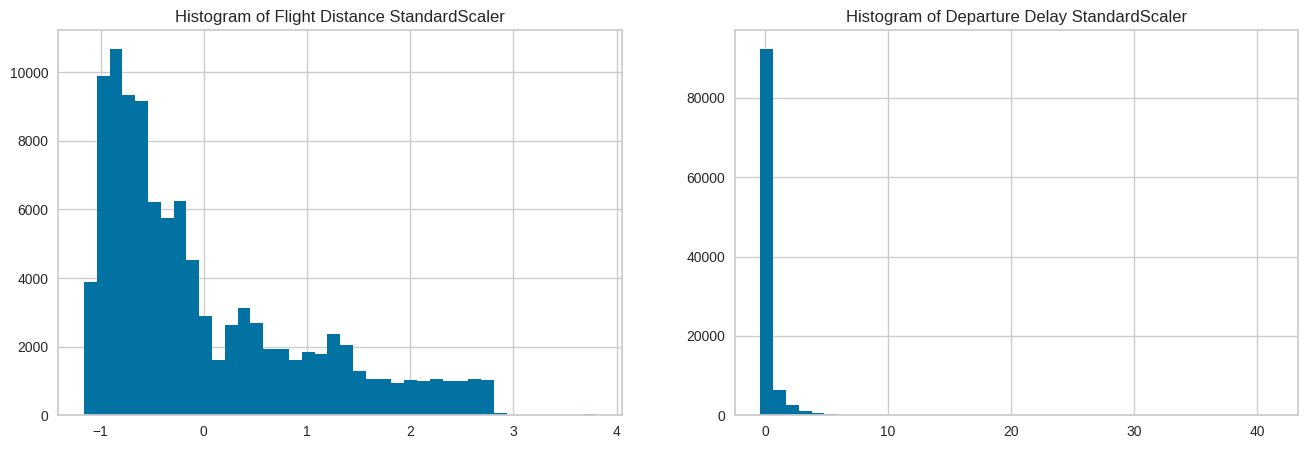

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,5))
ax1.hist(test_normalized["Flight Distance"],bins=40)
ax1.set_title("Histogram of Flight Distance StandardScaler")
ax2.hist(test_normalized["Departure Delay in Minutes"],bins=40)
ax2.set_title("Histogram of Departure Delay StandardScaler")

(array([5.8668e+04, 0.0000e+00, 0.0000e+00, 2.9480e+03, 0.0000e+00,
        2.2740e+03, 0.0000e+00, 2.0090e+03, 1.8540e+03, 1.6920e+03,
        1.5170e+03, 2.6870e+03, 1.2550e+03, 3.2240e+03, 1.8620e+03,
        3.0200e+03, 1.9690e+03, 2.5880e+03, 2.5900e+03, 1.9280e+03,
        2.0810e+03, 1.8760e+03, 1.6760e+03, 1.3910e+03, 1.2210e+03,
        9.9300e+02, 7.7900e+02, 6.3700e+02, 4.7800e+02, 2.6400e+02,
        1.8100e+02, 1.2600e+02, 6.1000e+01, 2.9000e+01, 1.0000e+01,
        7.0000e+00, 2.0000e+00, 5.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([0.        , 0.18433436, 0.36866872, 0.55300307, 0.73733743,
        0.92167179, 1.10600615, 1.2903405 , 1.47467486, 1.65900922,
        1.84334358, 2.02767794, 2.21201229, 2.39634665, 2.58068101,
        2.76501537, 2.94934972, 3.13368408, 3.31801844, 3.5023528 ,
        3.68668715, 3.87102151, 4.05535587, 4.23969023, 4.42402459,
        4.60835894, 4.7926933 , 4.97702766, 5.16136202, 5.34569637,
        5.53003073, 5.71436509, 5.89869945, 6.

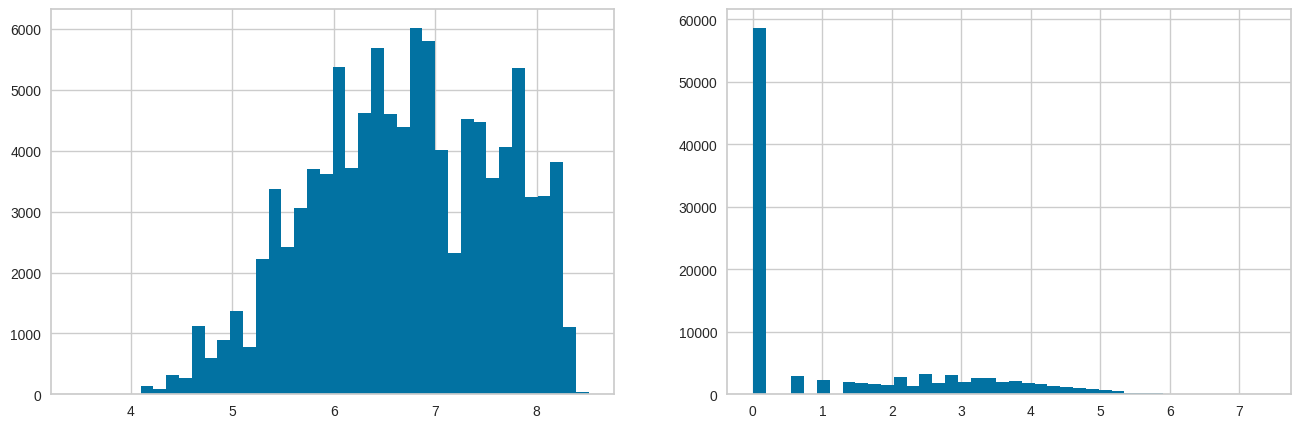

In [ ]:
# Testing Feature Transformation, using the log of variables to see if we may end up with a normal distribution
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,5))
ax1.hist(np.log(new_df["Flight Distance"]+1),bins=40)
ax2.hist(np.log(new_df["Departure Delay in Minutes"]+1),bins=40)

In [ ]:
# Transforming "Flight Distance" into its own log, in order to have a normal distribution
new_df["Flight Distance"] = np.log(new_df["Flight Distance"]+1)

None of the above methods were effective for the Departure Delay in Minutes. On the other hand, we cannot delete this feature because it genuinely affects the final answer and the level of satisfaction. So, we will categorize it.

## Creating bins for Departure Delay in Minutes

Depending on the amount of delay, the impact on individuals' satisfaction and stress varies, so we will have the following categories:

1. No delay or less than 10 minutes: The best situation.
2. Between 10 to 40 minutes delay: Acceptable delay.
3. Between 41 to 120 minutes delay: A justifiable level of dissatisfaction and stress.
4. Between 121 to 240 minutes delay: A significant amount of dissatisfaction, bordering on unbearable.
5. Between 241 to 450 minutes delay: Unacceptable.
6. More than 450 minutes delay: Unforgivable.

In [ ]:
def delay_transformation(x):
    if x<=10:
        x = "less_than_10min"
    elif x<=40:
        x = "10_to_40min"
    elif x<=120:
        x = "41_to_120min"
    elif x<=240:
        x = "121_240min"
    elif x<=450:
        x = "241_450min"
    else:
        x = "more_than_450min"

    return x

In [ ]:
# Testing the transformation to understand the sizes of our bins
new_df["Departure Delay in Minutes"].apply(delay_transformation).value_counts()/new_df.shape[0]

less_than_10min     0.731935
10_to_40min         0.159840
41_to_120min        0.083779
121_240min          0.019845
241_450min          0.004129
more_than_450min    0.000472
Name: Departure Delay in Minutes, dtype: float64

In [ ]:
# Applying the previous transformation
new_df["Departure Delay in Minutes"] = new_df["Departure Delay in Minutes"].apply(delay_transformation)

# Renaming the column for something more succint
new_df.rename(columns={"Departure Delay in Minutes":"Departure_Delay"},inplace=True)

## Creating dummies for the categorical variables

In [ ]:
new_df.dtypes

Gender                                 int64
Loyal                                  int64
Age                                    int64
Business Travel                        int64
Class                                 object
Flight Distance                      float64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure_Delay                       object
Dissatisfied                           int64
dtype: obj

In [ ]:
new_df = pd.get_dummies(new_df, columns=["Class","Departure_Delay"])

## Features scaling

We will scale two continuous variables.

In [ ]:
new_df.loc[:,["Age","Flight Distance"]] = StandardScaler().fit_transform(new_df.loc[:,["Age","Flight Distance"]])

We will also scale the combined variables based on the level of satisfaction.

In [ ]:
new_df.loc[:,"Inflight wifi service":"Cleanliness"] = StandardScaler().fit_transform(new_df.loc[:,"Inflight wifi service":"Cleanliness"])

In [ ]:
new_df

,Gender,Loyal,Age,Business Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Dissatisfied,Class_Business,Class_Eco,Class_Eco Plus,Departure_Delay_10_to_40min,Departure_Delay_121_240min,Departure_Delay_241_450min,Departure_Delay_41_to_120min,Departure_Delay_less_than_10min,Departure_Delay_more_than_450min
id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0.570318,1,0.006711,0.203579,-0.039537,0.173776,0.018094,1.352264,...,1,1,0,0,0,0,0,0,1,0
2,1,1,-0.289761,1,0.006711,-0.549533,-0.695245,-0.541060,-0.764614,-0.152031,...,0,1,0,0,1,0,0,0,0,0
3,0,1,0.107199,1,0.048423,0.956691,0.616172,0.888612,0.800803,1.352264,...,0,1,0,0,0,0,0,0,1,0
4,0,1,0.702638,1,0.925273,-0.549533,-0.695245,-0.541060,-0.764614,0.600117,...,0,1,0,0,0,0,0,0,1,0
5,1,1,0.636478,1,1.579975,0.203579,-0.039537,0.173776,0.018094,0.600117,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129874,1,1,-0.752880,0,-0.963918,0.956691,-0.695245,0.888612,0.800803,-0.152031,...,1,0,0,1,0,0,0,0,1,0
129875,1,1,1.033437,0,-1.061894,0.203579,0.616172,0.173776,0.800803,-0.904178,...,1,0,0,1,0,0,0,0,1,0
129878,0,1,0.173358,0,-0.963918,-0.549533,1.271880,-0.541060,-1.547323,-0.152031,...,1,0,0,1,0,0,0,0,1,0


**confusion matrix**

In [ ]:
def plot_confusion_matrix(y,y_predict):
 cm = confusion_matrix(y, y_predict)
 ax= plt.subplot()
 sns.heatmap(cm, cmap='coolwarm',annot=True,fmt = " ", ax = ax);
 ax.set_xlabel('Predicted labels')
 ax.set_ylabel('True labels')
 ax.set_title('Confusion Matrix');
 ax.xaxis.set_ticklabels(['neutral or dissatisfied','satisfied']); ax.yaxis.set_ticklabels(['neutral or dissatisfied','satisfied'])

##Split Data to Train and Test

In [ ]:
X = new_df.drop(columns=["Dissatisfied"])
y = new_df["Dissatisfied"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Base line**

In [ ]:
# Count the number of instances in each class
class_counts = df["Dissatisfied"].value_counts()

# Determine the majority class
majority_class = class_counts.idxmax()

# Predict the majority class for every instance
baseline_predictions = [majority_class] * len(df)

# Calculate the accuracy of the baseline model
baseline_accuracy = (baseline_predictions == df["Dissatisfied"]).mean()
print(f"Baseline accuracy: {baseline_accuracy:.2f}")

Baseline accuracy: 0.57


##Classification

In [ ]:
# Train the models
tree = DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors = 10)
rf = RandomForestClassifier()
nn = MLPClassifier()
svm = SVC(kernel='rbf')

tree.fit(X_train, y_train)
knn.fit(X_train, y_train)
rf.fit(X_train, y_train)
nn.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Evaluate the models
tree_pred = tree.predict(X_test)
knn_pred = knn.predict(X_test)
rf_pred = rf.predict(X_test)
nn_pred = nn.predict(X_test)
svm_pred = svm.predict(X_test)

 Train Accuracy for decision tree: 1.0000
 Test Accuracy for decision tree: 0.9457
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      9021
           1       0.95      0.95      0.95     11760

    accuracy                           0.95     20781
   macro avg       0.94      0.95      0.94     20781
weighted avg       0.95      0.95      0.95     20781

Training sample error for decision tree :  0.0
Error on the test sample for decision tree:  0.054280352244839035


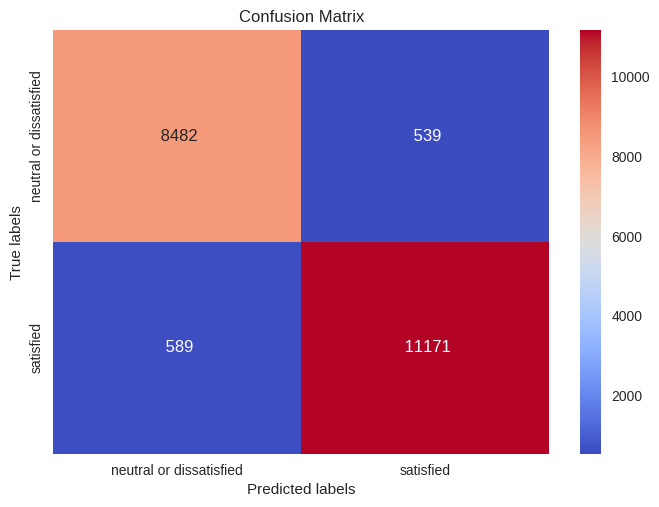

In [ ]:
# Evaluate the decision tree model
tree_acc_train = tree.score(X_train, y_train)
print(f" Train Accuracy for decision tree: {tree_acc_train:.4f}")
tree_acc = accuracy_score(y_test, tree_pred)
print(f" Test Accuracy for decision tree: {tree_acc:.4f}")
tree_result = classification_report(y_test, tree_pred)
print(tree_result)

tree_err_train = np.mean(y_train != tree.predict(X_train))
tree_err_test  = np.mean(y_test  != tree_pred)

print('Training sample error for decision tree : ', tree_err_train)
print('Error on the test sample for decision tree: ', tree_err_test)

plot_confusion_matrix(y_test,tree_pred)

[learning_curve] Training set sizes: [ 7792 15585 23378 31171 38964 46756 54549 62342 70135 77928]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   17.8s finished


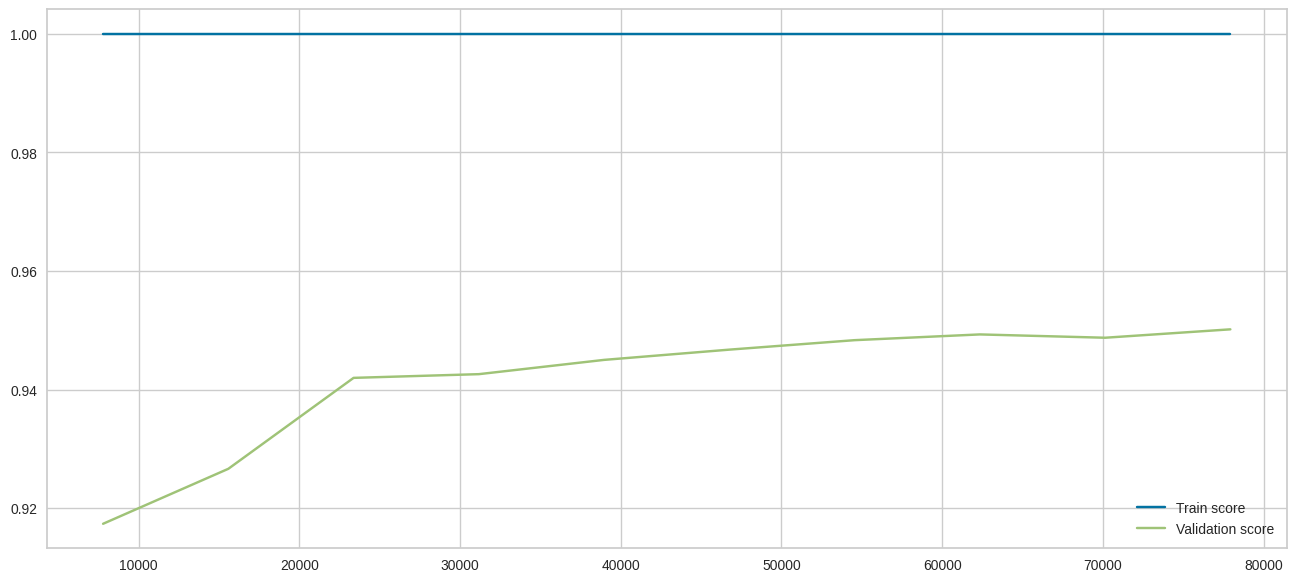

In [ ]:
N, train_score, val_score = learning_curve(tree,X, y, cv=4, scoring='f1',train_sizes=np.linspace(0.1, 1,10),verbose=1)
plt.figure(figsize=(16,7))
plt.plot(N, train_score.mean(axis=1), label="Train score")
plt.plot(N, val_score.mean(axis=1), label="Validation score")
plt.legend()

 Train Accuracy for KNeighbors : 0.9411
 Test Accuracy for KNeighbors: 0.9278
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      9021
           1       0.92      0.95      0.94     11760

    accuracy                           0.93     20781
   macro avg       0.93      0.92      0.93     20781
weighted avg       0.93      0.93      0.93     20781

Training sample error for KNeighbors:  0.058852543820603204
Error on the test sample for KNeighbors:  0.07222944035416967


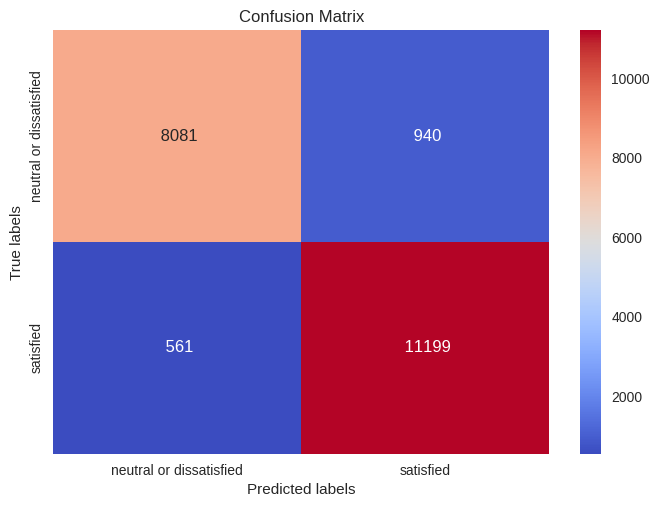

In [ ]:
# Evaluate the KNeighbors model
knn_acc_train = knn.score(X_train, y_train)
print(f" Train Accuracy for KNeighbors : {knn_acc_train:.4f}")
knn_acc = accuracy_score(y_test, knn_pred)
print(f" Test Accuracy for KNeighbors: {knn_acc:.4f}")
knn_result = classification_report(y_test, knn_pred)
print(knn_result)

knn_err_train = np.mean(y_train != knn.predict(X_train))
knn_err_test  = np.mean(y_test  != knn_pred)

print('Training sample error for KNeighbors: ', knn_err_train)
print('Error on the test sample for KNeighbors: ', knn_err_test)

plot_confusion_matrix(y_test,knn_pred)

 Train Accuracy for random forest: 1.0000
 Test Accuracy for random forest: 0.9613
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      9021
           1       0.95      0.98      0.97     11760

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781

Training sample error for  random forest:  0.0
Error on the test sample for  random forest:  0.0387373081179924


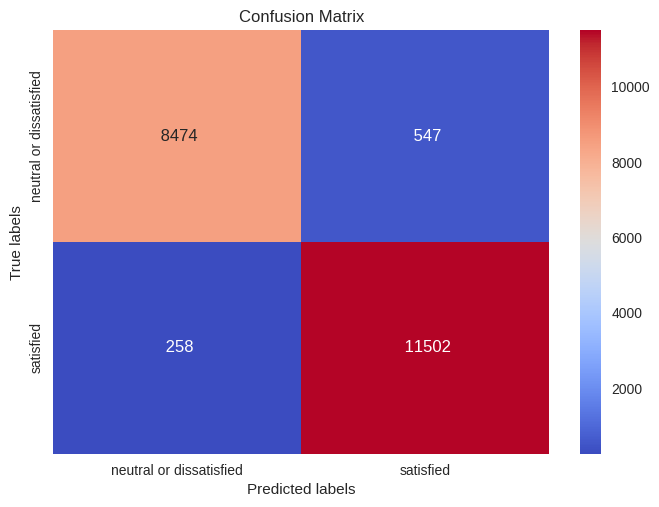

In [ ]:
# Evaluate the random forest model
rf_acc_train = rf.score(X_train, y_train)
print(f" Train Accuracy for random forest: {rf_acc_train:.4f}")
rf_acc = accuracy_score(y_test, rf_pred)
print(f" Test Accuracy for random forest: {rf_acc:.4f}")
rf_result = classification_report(y_test, rf_pred)
print(rf_result)

rf_err_train = np.mean(y_train != rf.predict(X_train))
rf_err_test  = np.mean(y_test  != rf_pred)

print('Training sample error for  random forest: ', rf_err_train)
print('Error on the test sample for  random forest: ', rf_err_test)

plot_confusion_matrix(y_test,rf_pred)

 Train Accuracy for Neural Network: 0.9693
 Test Accuracy for Neural Network: 0.9577
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      9021
           1       0.95      0.98      0.96     11760

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781

Training sample error for  Neural Network:  0.03070149056217894
Error on the test sample for  Neural Network:  0.04225013233241904


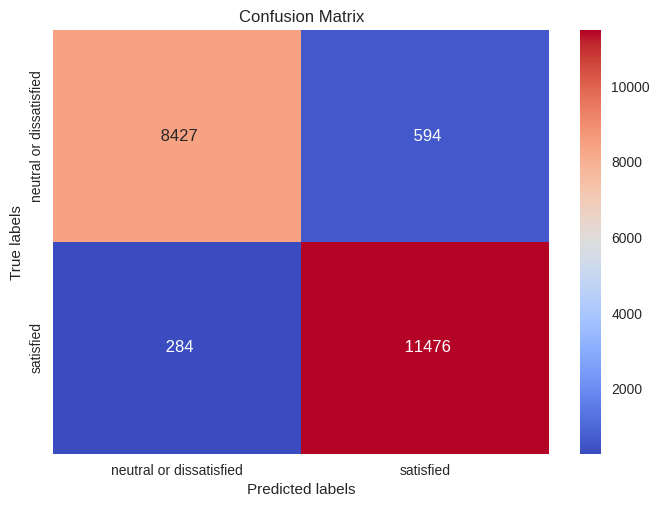

In [ ]:
# Evaluate the nn model
nn_acc_train = nn.score(X_train, y_train)
print(f" Train Accuracy for Neural Network: {nn_acc_train:.4f}")
nn_acc = accuracy_score(y_test, nn_pred)
print(f" Test Accuracy for Neural Network: {nn_acc:.4f}")
nn_result = classification_report(y_test, nn_pred)
print(nn_result)

nn_err_train = np.mean(y_train != nn.predict(X_train))
nn_err_test  = np.mean(y_test  != nn_pred)

print('Training sample error for  Neural Network: ', nn_err_train)
print('Error on the test sample for  Neural Network: ', nn_err_test)

plot_confusion_matrix(y_test,nn_pred)

 Train Accuracy for SVM: 0.9568
 Test Accuracy for SVM: 0.9520
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      9021
           1       0.95      0.97      0.96     11760

    accuracy                           0.95     20781
   macro avg       0.95      0.95      0.95     20781
weighted avg       0.95      0.95      0.95     20781

Training sample error for SVM:  0.043225100152785634
Error on the test sample for SVM:  0.047976517010730954


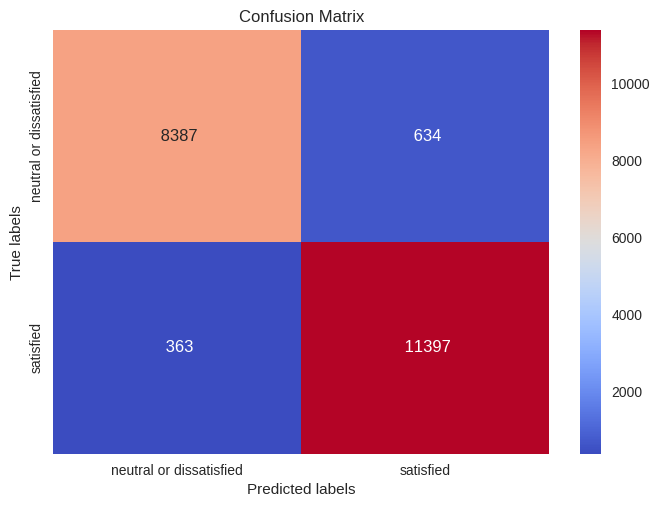

In [ ]:
# Evaluate the svm model
svm_acc_train = svm.score(X_train, y_train)
print(f" Train Accuracy for SVM: {svm_acc_train:.4f}")
svm_acc = accuracy_score(y_test, svm_pred)
print(f" Test Accuracy for SVM: {svm_acc:.4f}")
svm_result = classification_report(y_test, svm_pred)
print(svm_result)

svm_err_train = np.mean(y_train != svm.predict(X_train))
svm_err_test  = np.mean(y_test  != svm_pred)

print('Training sample error for SVM: ', svm_err_train)
print('Error on the test sample for SVM: ', svm_err_test)

plot_confusion_matrix(y_test,svm_pred)

**Hyperparameter Tuning**

In [ ]:
tree_max_depth = [int(x) for x in np.linspace(2, tree.get_depth(), num = 10)]
tree_min_samples_leaf = [1, 2, 3, 4, 5, 6, 7, 8 , 9, 10, 11, 12, 13, 14, 15]
tree_params = {
'max_depth': tree_max_depth ,
'min_samples_leaf': tree_min_samples_leaf
}
tree_cv = GridSearchCV(tree,tree_params,cv=5)
tree_cv.fit(X_train, y_train)
print("Best Parameters :",tree_cv.best_params_)
print("GridSearch Score :",(tree_cv.best_score_*100).round(2),'%')
y_predict = tree_cv.best_estimator_.predict(X_test)
print("Tuned Decision Tree Model Accuracy:",
(accuracy_score(y_test, y_predict)*100).round(2),'%')



Best Parameters : {'max_depth': 15, 'min_samples_leaf': 13}
GridSearch Score : 95.09 %
Tuned Decision Tree Model Accuracy: 95.51 %
